In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001265131"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001265131
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,Hilltop Holdings Inc.
Ticker,HTH


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,23.0,1.770391e+01,2.607614e+00,13.0,15.78,18.2,19.9,2.123000e+01
interest income,39.0,8.039582e+07,7.162758e+07,-883000.0,323500.00,99316000.0,123639500.0,3.290750e+08
net income,40.0,1.659495e+07,4.080156e+07,-124351000.0,-7289750.00,25202000.0,33343750.0,1.267090e+08
net interest income,25.0,1.065535e+08,4.138236e+07,68425000.0,92100000.00,100397000.0,108692000.0,2.962010e+08
provision for loan losses,20.0,7.292500e+06,9.299028e+06,158000.0,3103250.00,4201000.0,5658000.0,3.715800e+07
total revenue,24.0,7.399242e+07,1.878450e+07,45470000.0,61042250.00,64541000.0,87296750.0,1.143260e+08


# Plots

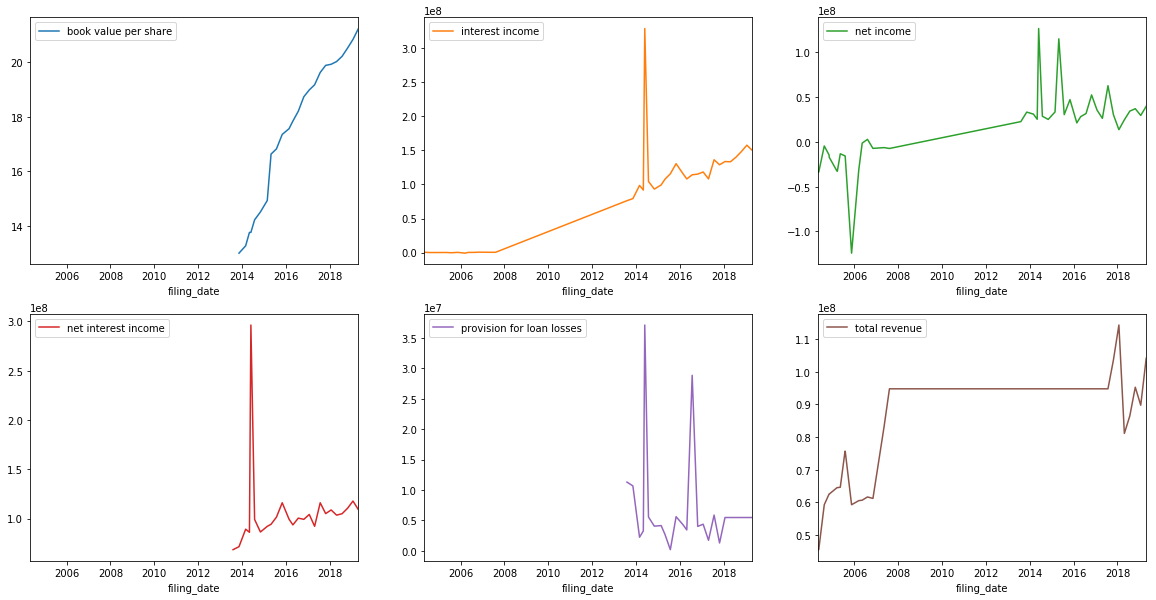

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001265131 book value per share       2004Q1 to 2013Q2: 38 periods    missing   
           interest income                                  2006Q4    missing   
           interest income            2007Q3 to 2013Q1: 23 periods    missing   
           interest income                                  2013Q4  duplicate   
           net income                                       2006Q4    missing   
           net income                 2007Q3 to 2013Q1: 23 periods    missing   
           net income                                       2013Q4  duplicate   
           net interest income        2004Q1 to 2013Q1: 37 periods    missing   
           net interest income                              2013Q4  duplicate   
           provision for loan losses  2004Q1 to 2013Q1: 37 periods    missing   
           provision for loan losses                        2013Q4  duplicate   
           provision for loan losses   2018Q1 to 2019Q1: 5 periods    missing   
           total revenue                                    2006Q4    missing   
           total revenue              2007Q3 to 2017Q2: 40 periods    missing   

                                               message  
cik        item                                         
0001265131 book value per share         Missing period  
           interest income              Missing period  
           interest income              Missing period  
           interest income            Duplicate period  
           net income                   Missing period  
           net income                   Missing period  
           net income                 Duplicate period  
           net interest income          Missing period  
           net interest income        Duplicate period  
           provision for loan losses    Missing period  
           provision for loan losses  Duplicate period  
           provision for loan losses    Missing period  
           total revenue                Missing period  
           total revenue                Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()